In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
import re
from IPython.display import display



In [33]:
# Load the csv file
fraud_csv = 'fraud_oracle.csv'
fraud_df = pd.read_csv(fraud_csv)

# Displays the first five rows of date column
display(fraud_df.head())

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


In [35]:
# Display total rows and columns
fraud_df.shape 

(15420, 33)

In [37]:
fraud_df.info()
# Displays dataset structure and column information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  FraudFound_P          15420 non-null

In [39]:
fraud_df.describe()
# Shows basic statistical summary for numerics

,WeekOfMonth,WeekOfMonthClaimed,Age,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Year
count,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000
mean,2.788586,2.693969,39.855707,0.059857,7710.500000,8.483268,407.704280,2.487808,1994.866472
std,1.287585,1.259115,13.492377,0.237230,4451.514911,4.599948,43.950998,1.119453,0.803313
min,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,300.000000,1.000000,1994.000000
25%,2.000000,2.000000,31.000000,0.000000,3855.750000,5.000000,400.000000,1.000000,1994.000000
50%,3.000000,3.000000,38.000000,0.000000,7710.500000,8.000000,400.000000,2.000000,1995.000000
75%,4.000000,4.000000,48.000000,0.000000,11565.250000,12.000000,400.000000,3.000000,1996.000000
max,5.000000,5.000000,80.000000,1.000000,15420.000000,16.000000,700.000000,4.000000,1996.000000


In [41]:
fraud_df[['Month']].describe()
# Provides statistical summary for Month column

,Month
count,15420
unique,12
top,Jan
freq,1411


In [43]:
fraud_df[['VehicleCategory']].describe()
# Provides statistical summary for VehicleCategory column

,VehicleCategory
count,15420
unique,3
top,Sedan
freq,9671


In [45]:
fraud_df[['Make']].describe()
# Provides statistical summary for Make column

,Make
count,15420
unique,19
top,Pontiac
freq,3837


In [171]:
fraud_df[['PolicyType']].describe()
# Provides statistical summary for PolicyType column

,PolicyType
count,15420
unique,9
top,Sedan - Collision
freq,5584


In [173]:
fraud_df[['VehiclePrice']].describe()
# Provides statistical summary for VehiclePrice column

,VehiclePrice
count,15420
unique,6
top,20000 to 29000
freq,8079


In [177]:
fraud_df[['MaritalStatus']].describe()
# Provides statistical summary for MaritalStatus column

,MaritalStatus
count,15420
unique,4
top,Married
freq,10625


In [179]:
fraud_df[['Sex']].describe()
# Provides statistical summary for Sex column

,Sex
count,15420
unique,2
top,Male
freq,13000


In [181]:
fraud_df[['DayOfWeekClaimed']].describe()
# Provides statistical summary for DayOfWeekClaimed column

,DayOfWeekClaimed
count,15420
unique,8
top,Monday
freq,3757


In [66]:
fraud_df.isnull().sum().sort_values(ascending=False) 
# Counts missing values in each column

Month                   0
RepNumber               0
Year                    0
NumberOfCars            0
AddressChange_Claim     0
NumberOfSuppliments     0
AgentType               0
WitnessPresent          0
PoliceReportFiled       0
AgeOfPolicyHolder       0
AgeOfVehicle            0
PastNumberOfClaims      0
Days_Policy_Claim       0
Days_Policy_Accident    0
DriverRating            0
Deductible              0
PolicyNumber            0
WeekOfMonth             0
FraudFound_P            0
VehiclePrice            0
VehicleCategory         0
PolicyType              0
Fault                   0
Age                     0
MaritalStatus           0
Sex                     0
WeekOfMonthClaimed      0
MonthClaimed            0
DayOfWeekClaimed        0
AccidentArea            0
Make                    0
DayOfWeek               0
BasePolicy              0
dtype: int64

  ## NULLS

In [71]:
#Display total number of nulll values as %
fraud_df.isnull().mean().sort_values(ascending=False) *100 

Month                   0.0
RepNumber               0.0
Year                    0.0
NumberOfCars            0.0
AddressChange_Claim     0.0
NumberOfSuppliments     0.0
AgentType               0.0
WitnessPresent          0.0
PoliceReportFiled       0.0
AgeOfPolicyHolder       0.0
AgeOfVehicle            0.0
PastNumberOfClaims      0.0
Days_Policy_Claim       0.0
Days_Policy_Accident    0.0
DriverRating            0.0
Deductible              0.0
PolicyNumber            0.0
WeekOfMonth             0.0
FraudFound_P            0.0
VehiclePrice            0.0
VehicleCategory         0.0
PolicyType              0.0
Fault                   0.0
Age                     0.0
MaritalStatus           0.0
Sex                     0.0
WeekOfMonthClaimed      0.0
MonthClaimed            0.0
DayOfWeekClaimed        0.0
AccidentArea            0.0
Make                    0.0
DayOfWeek               0.0
BasePolicy              0.0
dtype: float64

In [73]:
fraud_df.duplicated().sum() 
# Counts number of fully duplicated rows

0

In [75]:
fraud_df.drop_duplicates(inplace=True)

In [77]:
fraud_df.dtypes
# Displays data types for all columns

Month                   object
WeekOfMonth              int64
DayOfWeek               object
Make                    object
AccidentArea            object
DayOfWeekClaimed        object
MonthClaimed            object
WeekOfMonthClaimed       int64
Sex                     object
MaritalStatus           object
Age                      int64
Fault                   object
PolicyType              object
VehicleCategory         object
VehiclePrice            object
FraudFound_P             int64
PolicyNumber             int64
RepNumber                int64
Deductible               int64
DriverRating             int64
Days_Policy_Accident    object
Days_Policy_Claim       object
PastNumberOfClaims      object
AgeOfVehicle            object
AgeOfPolicyHolder       object
PoliceReportFiled       object
WitnessPresent          object
AgentType               object
NumberOfSuppliments     object
AddressChange_Claim     object
NumberOfCars            object
Year                     int64
BasePoli

In [79]:
fraud_df.columns.tolist()
# Lists all column names in dataframe

['Month',
 'WeekOfMonth',
 'DayOfWeek',
 'Make',
 'AccidentArea',
 'DayOfWeekClaimed',
 'MonthClaimed',
 'WeekOfMonthClaimed',
 'Sex',
 'MaritalStatus',
 'Age',
 'Fault',
 'PolicyType',
 'VehicleCategory',
 'VehiclePrice',
 'FraudFound_P',
 'PolicyNumber',
 'RepNumber',
 'Deductible',
 'DriverRating',
 'Days_Policy_Accident',
 'Days_Policy_Claim',
 'PastNumberOfClaims',
 'AgeOfVehicle',
 'AgeOfPolicyHolder',
 'PoliceReportFiled',
 'WitnessPresent',
 'AgentType',
 'NumberOfSuppliments',
 'AddressChange_Claim',
 'NumberOfCars',
 'Year',
 'BasePolicy']

In [81]:
fraud_df.describe(include='all').transpose()
# Full summary including categorical features

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Month,15420,12,Jan,1411,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WeekOfMonth,15420.0,NaN,NaN,NaN,2.788586,1.287585,1.0,2.0,3.0,4.0,5.0
DayOfWeek,15420,7,Monday,2616,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Make,15420,19,Pontiac,3837,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AccidentArea,15420,2,Urban,13822,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DayOfWeekClaimed,15420,8,Monday,3757,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MonthClaimed,15420,13,Jan,1446,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WeekOfMonthClaimed,15420.0,NaN,NaN,NaN,2.693969,1.259115,1.0,2.0,3.0,4.0,5.0
Sex,15420,2,Male,13000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MaritalStatus,15420,4,Married,10625,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [83]:
fraud_df.isnull().sum()

Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
FraudFound_P            0
PolicyNumber            0
RepNumber               0
Deductible              0
DriverRating            0
Days_Policy_Accident    0
Days_Policy_Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange_Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
dtype: int64

In [93]:
fraud_df[fraud_df.columns[fraud_df.isnull().any()]].isnull().sum()

Series([], dtype: float64)

In [163]:
import matplotlib.pyplot as plt


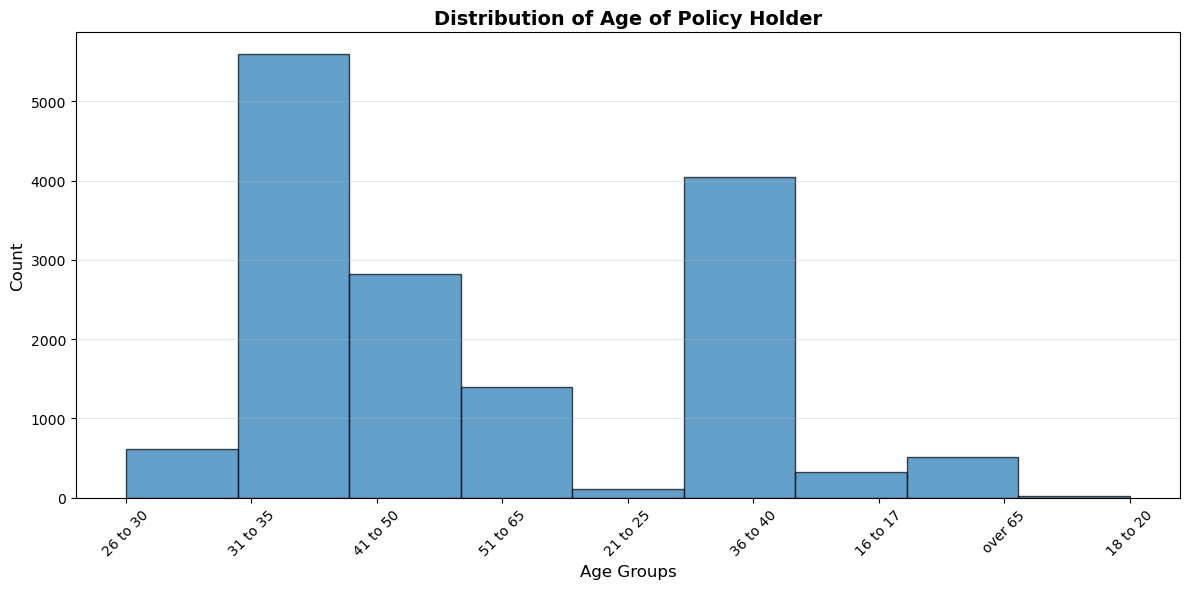

In [167]:
age_bins = ['16 to 17', '18 to 20', '21 to 25', '26 to 30', '31 to 35', 
           '36 to 40', '41 to 50', '51 to 65', 'Over 65']


plt.figure(figsize=(12, 6))
plt.hist(fraud_df['AgeOfPolicyHolder'], bins=len(age_bins), edgecolor='black', alpha=0.7)
plt.title('Distribution of Age of Policy Holder', fontsize=14, fontweight='bold')
plt.xlabel('Age Groups', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)


plt.tight_layout()
plt.show()

In [101]:
fraud_df.mean(numeric_only=True)
# Calculates mean of numeric columns only

WeekOfMonth              2.788586
WeekOfMonthClaimed       2.693969
Age                     39.855707
FraudFound_P             0.059857
PolicyNumber          7710.500000
RepNumber                8.483268
Deductible             407.704280
DriverRating             2.487808
Year                  1994.866472
dtype: float64

In [103]:
fraud_df.median(numeric_only=True)
# Calculates median of numeric columns only

WeekOfMonth              3.0
WeekOfMonthClaimed       3.0
Age                     38.0
FraudFound_P             0.0
PolicyNumber          7710.5
RepNumber                8.0
Deductible             400.0
DriverRating             2.0
Year                  1995.0
dtype: float64

In [141]:
# select columns
# Selects all categorical object-type columns
categorical_cols =fraud_df.select_dtypes(include='object').columns


for col in categorical_cols:
    print(f"\nColumn: {col}")
    print(fraud_df[col].value_counts().head(5))




Column: Month
Month
Jan    1411
May    1367
Mar    1360
Jun    1321
Oct    1305
Name: count, dtype: int64

Column: DayOfWeek
DayOfWeek
Monday       2616
Friday       2445
Tuesday      2300
Thursday     2173
Wednesday    2159
Name: count, dtype: int64

Column: Make
Make
Pontiac      3837
Toyota       3121
Honda        2801
Mazda        2354
Chevrolet    1681
Name: count, dtype: int64

Column: AccidentArea
AccidentArea
Urban    13822
Rural     1598
Name: count, dtype: int64

Column: DayOfWeekClaimed
DayOfWeekClaimed
Monday       3757
Tuesday      3375
Wednesday    2951
Thursday     2660
Friday       2497
Name: count, dtype: int64

Column: MonthClaimed
MonthClaimed
Jan    1446
May    1411
Mar    1348
Oct    1339
Jun    1293
Name: count, dtype: int64

Column: Sex
Sex
Male      13000
Female     2420
Name: count, dtype: int64

Column: MaritalStatus
MaritalStatus
Married     10625
Single       4684
Divorced       76
Widow          35
Name: count, dtype: int64

Column: Fault
Fault
Policy Hold

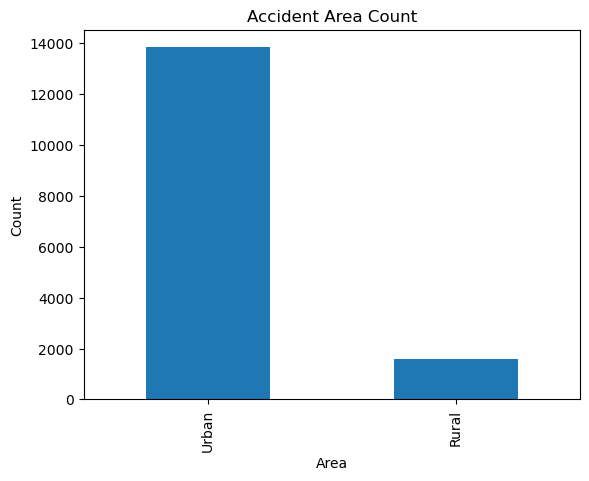

In [145]:
fraud_df['AccidentArea'].value_counts().plot(kind='bar')
plt.title('Accident Area Count')
plt.xlabel('Area')
plt.ylabel('Count')
plt.show()

In [149]:
fraud_df['FraudFound_P'].value_counts()
# Shows frequency counts for fraud column

FraudFound_P
0    14497
1      923
Name: count, dtype: int64

In [151]:
(fraud_df['FraudFound_P'].value_counts(normalize=True) * 100)
# Shows fraud percentages for each category

FraudFound_P
0    94.014267
1     5.985733
Name: proportion, dtype: float64

In [121]:
data_types_df = pd.DataFrame(fraud_df.dtypes, columns = ['DataType'])
data_types_df
# Creates dataframe containing columns' data types

,DataType
Month,object
WeekOfMonth,int64
DayOfWeek,object
Make,object
AccidentArea,object
DayOfWeekClaimed,object
MonthClaimed,object
WeekOfMonthClaimed,int64
Sex,object
MaritalStatus,object


In [212]:
# Rename columns:
fraud_df.columns = ['Month', 'Week Of Month', 'Day Of Week', 'Make', 'Accident Area',
       'Day Of Week Claimed', 'Month Claimed', 'Week Of Month Claimed', 'Sex',
       'Marital Status', 'Age', 'Fault', 'Policy Type', 'Vehicle Category',
       'Vehicle Price', 'Fraud Found_P', 'Policy Number', 'Rep Number',
       'Deductible', 'Driver Rating', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'Past Number Of Claims', 'Age Of Vehicle',
       'Age Of Policy Holder', 'Police Report Filed', 'Witness Present', 'Agent Type',
       'Number Of Suppliments', 'Address Change_Claim', 'Number Of Cars', 'Year',
       'Base Policy']

In [214]:
fraud_df.head()

,Month,Week Of Month,Day Of Week,Make,Accident Area,Day Of Week Claimed,Month Claimed,Week Of Month Claimed,Sex,Marital Status,...,Age Of Vehicle,Age Of Policy Holder,Police Report Filed,Witness Present,Agent Type,Number Of Suppliments,Address Change_Claim,Number Of Cars,Year,Base Policy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


In [232]:
fraud_df = fraud_df.dropna(thresh=fraud_df.shape[1] - 2)

In [234]:
import pandas as pd
fraud_df = pd.read_csv("fraud_oracle.csv")

fraud_df = fraud_df.dropna(thresh=fraud_df.shape[1] - 2)
#remove space

In [236]:
fraud_df['date'] = pd.to_datetime(fraud_df['Year'].astype(str) + '-' + fraud_df['Month'].astype(str) + '-01')

In [238]:
fraud_df[['Year', 'Month', 'date']].head()
# Converts year and month into full date column

,Year,Month,date
0,1994,Dec,1994-12-01
1,1994,Jan,1994-01-01
2,1994,Oct,1994-10-01
3,1994,Jun,1994-06-01
4,1994,Jan,1994-01-01


In [242]:
fraud_df.to_csv('fraud1.csv', index = False)